In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/dogrose/musan-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: talhaarshad1
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dogrose/musan-dataset


100%|██████████| 10.3G/10.3G [02:35<00:00, 71.1MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Source folder in Colab
source_folder = "/content/musan-dataset"

# Destination folder in Google Drive
destination_folder = "/content/drive/My Drive/SNSProject/musan-dataset"

# Copy the folder to Google Drive
shutil.copytree(source_folder, destination_folder)


'/content/drive/My Drive/SNSProject/musan-dataset'

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import drive

In [ ]:
import os
import pandas as pd

# Define the dataset path
base_path = '/content/musan-dataset/musan'  # Adjust path as per your Kaggle notebook setup

# List to store file paths and classes
data = []

# Traverse through the directories
for class_name in ['music', 'noise', 'speech']:
    class_path = os.path.join(base_path, class_name)
    if os.path.exists(class_path):
        for root, _, files in os.walk(class_path):
            for file in files:
                # Check if the file has a .wav extension
                if file.endswith('.wav'):
                    # Get the full file path
                    file_path = os.path.join(root, file)
                    # Append the file path and class to the list
                    data.append([file_path, class_name])

# Create a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'class'])

# Save to a CSV file
output_csv_path = '/content/drive/My Drive/SNSProject/musan-dataset/musan/musan_data.csv'
df.to_csv(output_csv_path, index=False)

print(f"CSV file saved at {output_csv_path}")


CSV file saved at /content/drive/My Drive/SNSProject/musan-dataset/musan/musan_data.csv


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from IPython.display import Audio
import shutil
import os

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
csv_file = '/content/drive/My Drive/SNSProject/musan-dataset/musan/musan_data.csv'
output_folder = '/content/drive/My Drive/SNSProject/musan-dataset/musan/speech_filtered'

In [ ]:
df = pd.read_csv(csv_file)

In [ ]:
os.makedirs(output_folder, exist_ok=True)

In [ ]:
def process_audio(file_path, lowcut=300, highcut=3000):
    # Read the .wav file
    fs, data = wav.read(file_path)

    # Apply the band-pass filter
    filtered_data = apply_bandpass_filter(data, lowcut, highcut, fs)

    # Generate the output file path
    output_path = os.path.join(output_folder, os.path.basename(file_path))

    # Save the filtered .wav file
    wav.write(output_path, fs, np.int16(filtered_data))

    return output_path

In [ ]:
import scipy.io.wavfile as wav

In [ ]:
df_speech = df[df['class'] == 'speech']

In [ ]:
new_file_paths = []
for index, row in df_speech.iterrows():
    file_path = row['filepath']  # Get the original file path
    filtered_file_path = process_audio(file_path)  # Apply filter and save to new folder
    new_file_paths.append(filtered_file_path)


In [ ]:
csv_file = '/content/drive/My Drive/SNSProject/musan-dataset/musan/musan_data.csv'

In [ ]:
music_df = df[df['class'] == 'music']

In [ ]:
music_df.head()

,filtered_filepath,class
426,/content/drive/My Drive/SNSProject/musan-datas...,music
427,/content/drive/My Drive/SNSProject/musan-datas...,music
428,/content/drive/My Drive/SNSProject/musan-datas...,music
429,/content/drive/My Drive/SNSProject/musan-datas...,music
430,/content/drive/My Drive/SNSProject/musan-datas...,music


In [ ]:
csv_file = '/content/drive/MyDrive/SNSProject/musan-dataset/musan/final_updated_musan_dataset.csv'
output_folder = '/content/drive/My Drive/SNSProject/musan-dataset/musan/music_filtered'

In [ ]:
os.makedirs(output_folder, exist_ok=True)

In [ ]:
def process_audio(file_path, lowcut=300, highcut=5000):
    # Read the .wav file
    fs, data = wav.read(file_path)

    # Apply the band-pass filter
    filtered_data = apply_bandpass_filter(data, lowcut, highcut, fs)

    # Generate the output file path
    output_path = os.path.join(output_folder, os.path.basename(file_path))

    # Save the filtered .wav file
    wav.write(output_path, fs, np.int16(filtered_data))

    return output_path

In [ ]:
new_file_paths = []
for index, row in music_df.iterrows():
    file_path = row['filtered_filepath']  # Get the original file path
    print(file_path)
    filtered_file_path = process_audio(file_path)  # Apply filter and save to new folder
    new_file_paths.append(filtered_file_path)


/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0022.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0075.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0062.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0034.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0026.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0045.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0059.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0040.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0005.wav
/content/drive/My Drive/SNSProject/musan-dataset/musan/music/fma-western-art/music-fma-wa-0053.wav
/content/d

In [ ]:
# Select and reorder the desired columns
filtered_df = df_speech[['filtered_filepath', 'class']]

# Save the updated dataframe to a new CSV
output_csv = '/content/drive/My Drive/SNSProject/musan-dataset/musan/updated_musan_dataset.csv'
filtered_df.to_csv(output_csv, index=False)


In [ ]:
musan_dataset_path = '/content/drive/My Drive/SNSProject/musan-dataset/musan/musan_data.csv'
# Load the datasetsmusan_dataset_path = '/path/to/musan_dataset.csv'
updated_musan_dataset_path = '/content/drive/My Drive/SNSProject/musan-dataset/musan/updated_musan_dataset.csv'

musan_df = pd.read_csv(musan_dataset_path)
updated_df = pd.read_csv(updated_musan_dataset_path)

# Filter rows with 'music' and 'noise' classes
filtered_musan_df = musan_df[musan_df['class'].isin(['music', 'noise'])]

# Rename 'filepath' to 'filtered_filepath' for consistency
filtered_musan_df = filtered_musan_df.rename(columns={'filepath': 'filtered_filepath'})

# Append the filtered musan data to the updated dataset
final_df = pd.concat([updated_df, filtered_musan_df], ignore_index=True)

# Save the final dataset to a new CSV file
output_csv = '/content/drive/My Drive/SNSProject/musan-dataset/musan/final_updated_musan_dataset.csv'
final_df.to_csv(output_csv, index=False)


In [ ]:
# Process the music file paths and generate new filtered paths
new_file_paths = []
for index, row in filtered_musan_df[filtered_musan_df['class'] == 'music'].iterrows():
    file_path = row['filtered_filepath']  # Get the original file path
    print(file_path)
    filtered_file_path = process_audio(file_path)  # Apply filter and save to new folder
    new_file_paths.append(filtered_file_path)

# Replace the original 'filtered_filepath' for the music rows with the new file paths
filtered_musan_df.loc[filtered_musan_df['class'] == 'music', 'filtered_filepath'] = new_file_paths

# Append the filtered musan data (with updated file paths) to the updated dataset
final_df = pd.concat([updated_df, filtered_musan_df], ignore_index=True)

# Save the final dataset with updated file paths to a new CSV file
output_csv = '/content/drive/My Drive/SNSProject/musan-dataset/musan/final_updated_musan_dataset.csv'
final_df.to_csv(output_csv, index=False)


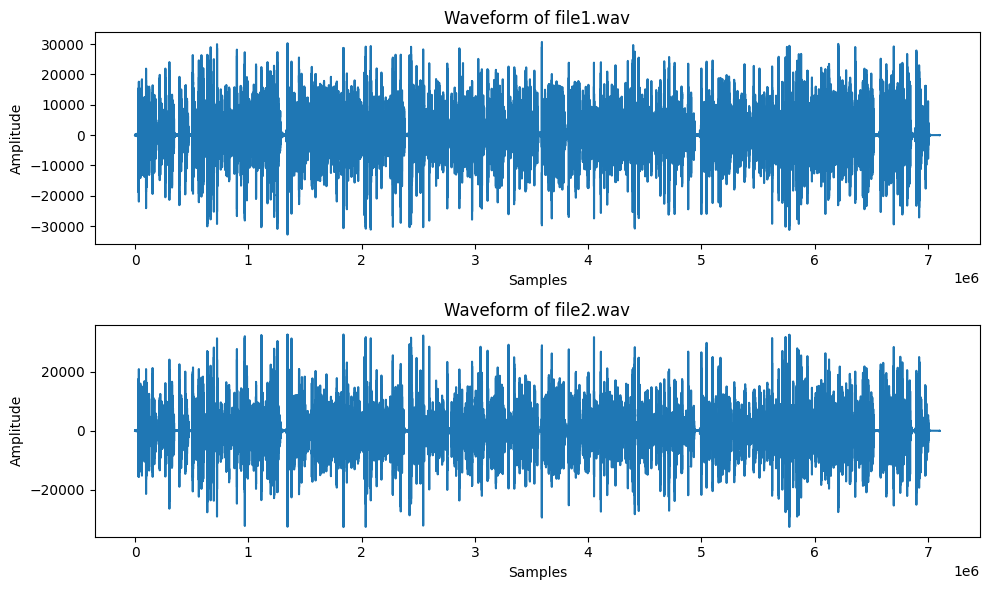

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the two .wav files
sample_rate1, data1 = wavfile.read('/content/drive/MyDrive/SNSProject/musan-dataset/musan/speech/librivox/speech-librivox-0000.wav')
sample_rate2, data2 = wavfile.read('/content/drive/MyDrive/SNSProject/musan-dataset/musan/speech_filtered/speech-librivox-0000.wav')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot the first .wav file
ax1.plot(data1)
ax1.set_title('Waveform of file1.wav')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Amplitude')

# Plot the second .wav file
ax2.plot(data2)
ax2.set_title('Waveform of file2.wav')
ax2.set_xlabel('Samples')
ax2.set_ylabel('Amplitude')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Display the plot
plt.show()


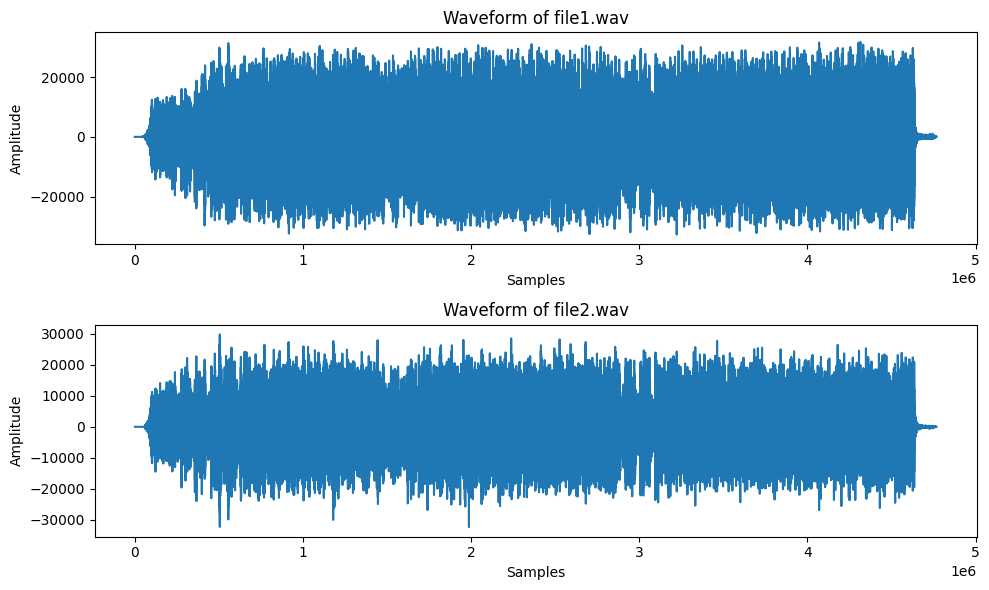

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the two .wav files
sample_rate1, data1 = wavfile.read('/content/drive/MyDrive/SNSProject/musan-dataset/musan/music/fma/music-fma-0000.wav')
sample_rate2, data2 = wavfile.read('/content/drive/MyDrive/SNSProject/musan-dataset/musan/music_filtered/music-fma-0000.wav')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot the first .wav file
ax1.plot(data1)
ax1.set_title('Waveform of file1.wav')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Amplitude')

# Plot the second .wav file
ax2.plot(data2)
ax2.set_title('Waveform of file2.wav')
ax2.set_xlabel('Samples')
ax2.set_ylabel('Amplitude')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Display the plot
plt.show()
